In [2]:
import sys
sys.path.append(sys.path[0].replace('/Development Notebooks',''))
from group_decomposition import fragfunctions as ff
from group_decomposition.utils import mol_from_molfile, set_scaffold_params, get_scaffold_vertices, find_smallest_rings, xyz_from_cml
import rdkit
from rdkit import Chem, rdBase
from rdkit.Chem import BRICS
from rdkit.Chem import AllChem #used for 3d coordinates
from rdkit.Chem import Draw,rdDepictor
from rdkit.Chem.Draw import IPythonConsole, rdMolDraw2D
from rdkit.Chem.Scaffolds import rdScaffoldNetwork # scaffolding
from rdkit import RDPaths
from rdkit.Chem.Draw import rdMolDraw2D
import numpy as np


In [2]:
conformer = mol_from_molfile('mol.txt')

In [3]:
# conformer.GetId(0)

In [4]:
# node_2_mol = Chem.MolFromSmiles(network.nodes[3])
# node_2_mol.GetNumAtoms()

In [5]:
# test_atom = node_2_mol.GetAtomWithIdx(2)

In [6]:
# list(test_atom.GetPropNames())

In [7]:
# test_atom.GetProp('molAtomMapNumber')

In [8]:
# Chem.MolToSmiles(node_2_mol)

In [9]:
# node_2_mol.GetNumAtoms()

In [10]:
mol_dict = mol_from_molfile('mol.txt')

In [11]:
mol, xyz_coords = mol_dict['Molecule'], mol_dict['xyz_pos']

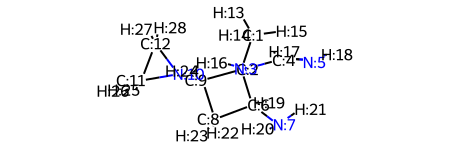

In [12]:
mol

In [13]:
len(xyz_coords)

28

In [14]:
mol1nodemols = get_scaffold_vertices(mol)

[11:49:22] Running LargestFragmentChooser
[11:49:22] Fragment: [C:1]([C@:2]1([N:3]([C:4](=[N:5][H:18])[H:17])[H:16])[C@:6]([N:7]([H:20])[H:21])([H:19])[C:8]([H:22])([H:23])[C@:9]1([N:10]1[C:11]([H:25])([H:26])[C:12]1([H:27])[H:28])[H:24])([H:13])([H:14])[H:15]
[11:49:22] New largest fragment: [C:1]([C@:2]1([N:3]([C:4](=[N:5][H:18])[H:17])[H:16])[C@:6]([N:7]([H:20])[H:21])([H:19])[C:8]([H:22])([H:23])[C@:9]1([N:10]1[C:11]([H:25])([H:26])[C:12]1([H:27])[H:28])[H:24])([H:13])([H:14])[H:15] (28)


In [15]:
ring_frags = find_smallest_rings(mol1nodemols)
mol_frame = ff._initialize_molecule_frame(mol,xyz_coords)
mol_frame

,atomNum,inRing,molPart,xyz
0,6,False,Unknown,"[0.9934, 1.4958, -1.0601]"
1,6,True,Unknown,"[0.5628, 0.1952, -0.396]"
2,7,False,Unknown,"[0.7309, 0.2221, 1.0493]"
3,6,False,Unknown,"[1.9209, 0.5431, 1.6219]"
4,7,False,Unknown,"[3.0934, 0.462, 1.0981]"
5,6,True,Unknown,"[0.9799, -1.1527, -1.0899]"
6,7,False,Unknown,"[1.9566, -1.9023, -0.302]"
7,6,True,Unknown,"[-0.4428, -1.6877, -0.7887]"
8,6,True,Unknown,"[-0.9144, -0.2111, -0.7994]"
9,7,True,Unknown,"[-1.8366, 0.0174, 0.331]"


In [16]:
ring_frags


In [17]:
list(np.array(xyz_coords).T[0])

[0.9934,
 0.5628,
 0.7309,
 1.9209,
 3.0934,
 0.9799,
 1.9566,
 -0.4428,
 -0.9144,
 -1.8366,
 -3.2314,
 -2.701,
 0.5014,
 0.7331,
 2.0753,
 -0.1356,
 1.8035,
 3.7948,
 1.2212,
 1.6325,
 2.7858,
 -0.5636,
 -0.8749,
 -1.2356,
 -3.4523,
 -3.859,
 -2.978,
 -2.5602]

In [18]:
ring_atom_indices = ff._identify_ring_atom_index(mol,ring_frags)

In [19]:
ring_indices_nosubset = ff._remove_subset_rings(ring_atom_indices)

In [20]:
ring_indices_nosubset

[(1, 5, 7, 8), (9, 10, 11)]

In [21]:
ff._assign_rings_to_mol_frame(ring_indices_nosubset,mol_frame)

,atomNum,inRing,molPart,xyz
0,6,False,Unknown,"[0.9934, 1.4958, -1.0601]"
1,6,True,Ring 1,"[0.5628, 0.1952, -0.396]"
2,7,False,Unknown,"[0.7309, 0.2221, 1.0493]"
3,6,False,Unknown,"[1.9209, 0.5431, 1.6219]"
4,7,False,Unknown,"[3.0934, 0.462, 1.0981]"
5,6,True,Ring 1,"[0.9799, -1.1527, -1.0899]"
6,7,False,Unknown,"[1.9566, -1.9023, -0.302]"
7,6,True,Ring 1,"[-0.4428, -1.6877, -0.7887]"
8,6,True,Ring 1,"[-0.9144, -0.2111, -0.7994]"
9,7,True,Ring 2,"[-1.8366, 0.0174, 0.331]"


In [22]:
ff._set_hydrogens_in_ring(mol_frame,mol)

,atomNum,inRing,molPart,xyz
0,6,False,Unknown,"[0.9934, 1.4958, -1.0601]"
1,6,True,Ring 1,"[0.5628, 0.1952, -0.396]"
2,7,False,Unknown,"[0.7309, 0.2221, 1.0493]"
3,6,False,Unknown,"[1.9209, 0.5431, 1.6219]"
4,7,False,Unknown,"[3.0934, 0.462, 1.0981]"
5,6,True,Ring 1,"[0.9799, -1.1527, -1.0899]"
6,7,False,Unknown,"[1.9566, -1.9023, -0.302]"
7,6,True,Ring 1,"[-0.4428, -1.6877, -0.7887]"
8,6,True,Ring 1,"[-0.9144, -0.2111, -0.7994]"
9,7,True,Ring 2,"[-1.8366, 0.0174, 0.331]"


In [23]:
mol.GetAtomWithIdx(0).GetNeighbors()[0]

In [24]:
ff.generate_full_mol_frame(mol,xyz_coords)

[11:49:23] Running LargestFragmentChooser
[11:49:23] Fragment: [C:1]([C@:2]1([N:3]([C:4](=[N:5][H:18])[H:17])[H:16])[C@:6]([N:7]([H:20])[H:21])([H:19])[C:8]([H:22])([H:23])[C@:9]1([N:10]1[C:11]([H:25])([H:26])[C:12]1([H:27])[H:28])[H:24])([H:13])([H:14])[H:15]
[11:49:23] New largest fragment: [C:1]([C@:2]1([N:3]([C:4](=[N:5][H:18])[H:17])[H:16])[C@:6]([N:7]([H:20])[H:21])([H:19])[C:8]([H:22])([H:23])[C@:9]1([N:10]1[C:11]([H:25])([H:26])[C:12]1([H:27])[H:28])[H:24])([H:13])([H:14])[H:15] (28)


,atomNum,inRing,molPart,xyz
0,6,False,Peripheral 1,"[0.9934, 1.4958, -1.0601]"
1,6,True,Ring 1,"[0.5628, 0.1952, -0.396]"
2,7,False,Peripheral 2,"[0.7309, 0.2221, 1.0493]"
3,6,False,Peripheral 2,"[1.9209, 0.5431, 1.6219]"
4,7,False,Peripheral 2,"[3.0934, 0.462, 1.0981]"
5,6,True,Ring 1,"[0.9799, -1.1527, -1.0899]"
6,7,False,Peripheral 3,"[1.9566, -1.9023, -0.302]"
7,6,True,Ring 1,"[-0.4428, -1.6877, -0.7887]"
8,6,True,Ring 1,"[-0.9144, -0.2111, -0.7994]"
9,7,True,Ring 2,"[-1.8366, 0.0174, 0.331]"


In [25]:
fragment_smiles = ff._trim_molpart(mol_frame,mol_frame['molPart'].unique(),mol)

In [26]:
full_smi = ff._break_molparts(fragment_smiles['smiles'],fragment_smiles['count']
                               ,drop_parent=True,patt='[$([C;X4;!R]):1]-[$([R,!$([C;X4]);!#0;!#9;!#17;!#35;!#1]):2]')

,Smiles,Molecule
0,[4*][N:10]1[CH2:11][CH2:12]1,
1,[1*][C@:2]1([2*])[C@@H:6]([3*])[CH2:8][C@H:9]1...,
2,[2*][NH:3][CH:4]=[NH:5],
3,[3*][NH2:7],
4,[1*][CH3:1],

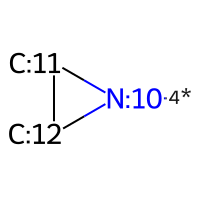
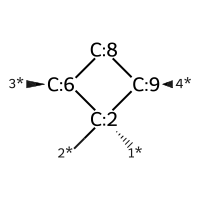
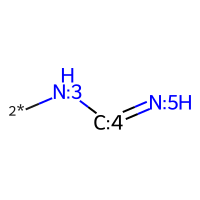
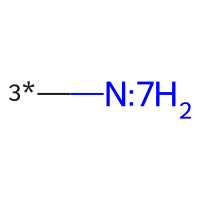
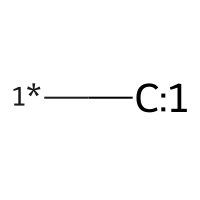

In [27]:
ff._generate_fragment_frame(full_smi)

[14:19:19] Running LargestFragmentChooser
[14:19:19] Fragment: [C:1]([C@:2]1([N:3]([C:4](=[N:5][H:18])[H:17])[H:16])[C@:6]([N:7]([H:20])[H:21])([H:19])[C:8]([H:22])([H:23])[C@:9]1([N:10]1[C:11]([H:25])([H:26])[C:12]1([H:27])[H:28])[H:24])([H:13])([H:14])[H:15]
[14:19:19] New largest fragment: [C:1]([C@:2]1([N:3]([C:4](=[N:5][H:18])[H:17])[H:16])[C@:6]([N:7]([H:20])[H:21])([H:19])[C:8]([H:22])([H:23])[C@:9]1([N:10]1[C:11]([H:25])([H:26])[C:12]1([H:27])[H:28])[H:24])([H:13])([H:14])[H:15] (28)


,Smiles,Molecule,numAttachments,Atoms,xyz,Labels
0,[4*]N1CC1,,1,"[10, 11, 12, 25, 26, 27, 28]","[[2.1614951848, 0.0987681757, -0.3856958646], ...","[N, C, C, H, H, H, H]"
1,[1*]C,,1,"[1, 13, 14, 15]","[[-0.4535358949, 0.2234540606, -1.6469131302],...","[C, H, H, H]"
2,[1*][C@@]1([2*])[C@H]([4*])C[C@@H]1[3*],,4,"[2, 6, 8, 9, 19, 22, 23, 24]","[[-0.3923738854, 0.0967594812, -0.1272617014],...","[C, C, C, C, H, H, H, H]"
3,[3*]N,,1,"[7, 20, 21]","[[-1.7727338429, -2.0346443043, -0.4117740679]...","[N, H, H]"
4,[2*]NC=N,,1,"[3, 4, 5, 16, 17, 18]","[[-0.9739272989, 1.2613052532, 0.5309204078], ...","[N, C, N, H, H, H]"

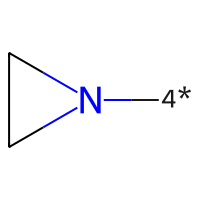
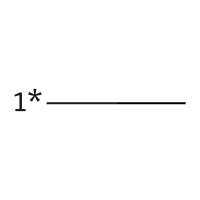
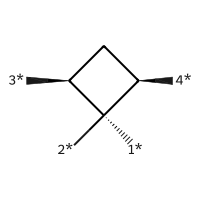
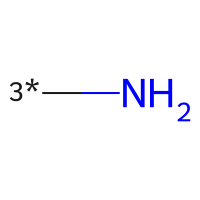
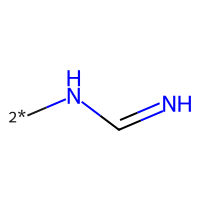

In [3]:
frag_frame = ff.identify_connected_fragments('mol.txt',input_type='molfile',cml_file='cml.txt')
mol = Chem.MolFromMolFile('mol.txt')
frag_frame

[10, 11, 12, 25, 26, 27, 28]
10
9
[2.1614951848, 0.0987681757, -0.3856958646]
[False, True, False, False, False]
[1.0178751918, -0.2572102126, 0.4158366157]
[2, 6, 8, 9, 19, 22, 23, 24]
2
1
[-0.3923738854, 0.0967594812, -0.1272617014]
[False, False, False, False, True]
[-0.4535358949, 0.2234540606, -1.6469131302]
[3, 4, 5, 16, 17, 18]
3
2
[-0.9739272989, 1.2613052532, 0.5309204078]
[False, True, False, False, False]
[-0.3923738854, 0.0967594812, -0.1272617014]
[7, 20, 21]
7
6
[-1.7727338429, -2.0346443043, -0.4117740679]
[False, True, False, False, False]
[-0.8644637082, -1.2791216843, 0.4143152418]
[1, 13, 14, 15]
1
2
[-0.4535358949, 0.2234540606, -1.6469131302]
[False, True, False, False, False]
[-0.3923738854, 0.0967594812, -0.1272617014]


,Smiles,Molecule,numAttachments,Atoms,xyz,Labels,H_xyz,at_idx
0,[4*]N1CC1,,1,"[10, 11, 12, 25, 26, 27, 28]","[[2.1614951848, 0.0987681757, -0.3856958646], ...","[N, C, C, H, H, H, H]","[1.364426704830303, -0.1493379737212121, 0.172...",0
1,[1*][C@@]1([2*])[C@H]([4*])C[C@@H]1[3*],,4,"[2, 6, 8, 9, 19, 22, 23, 24]","[[-0.3923738854, 0.0967594812, -0.1272617014],...","[C, C, C, C, H, H, H, H]","[-0.43500195262727276, 0.18506176381212122, -1...",0
2,[2*]NC=N,,1,"[3, 4, 5, 16, 17, 18]","[[-0.9739272989, 1.2613052532, 0.5309204078], ...","[N, C, N, H, H, H]","[-0.5744764694252525, 0.46141522798787876, 0.0...",0
3,[3*]N,,1,"[7, 20, 21]","[[-1.7727338429, -2.0346443043, -0.4117740679]...","[N, H, H]","[-1.1488715281565656, -1.5156994744010102, 0.1...",0
4,[1*]C,,1,"[1, 13, 14, 15]","[[-0.4535358949, 0.2234540606, -1.6469131302],...","[C, H, H, H]","[-0.41090782767272727, 0.13515177798787878, -0...",0

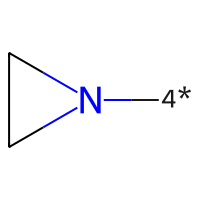
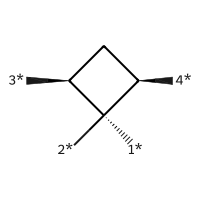
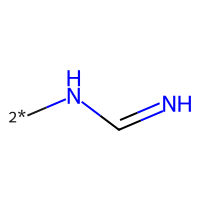
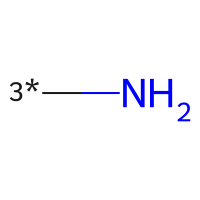
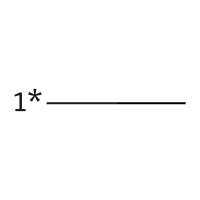

In [29]:
ff.output_ifc_gjf(mol,frag_frame)

,Smiles,xyz,Molecule,count,numAttachments
0,*N1CC1,"[[2.1614951848, 0.0987681757, -0.3856958646], ...",,1,1
1,*C,"[[-0.4535358949, 0.2234540606, -1.6469131302],...",,1,1
2,*[C@@H]1C[C@H](*)C1(*)*,"[[-0.3923738854, 0.0967594812, -0.1272617014],...",,1,4
3,*N,"[[-1.7727338429, -2.0346443043, -0.4117740679]...",,1,1
4,*NC=N,"[[-0.9739272989, 1.2613052532, 0.5309204078], ...",,1,1

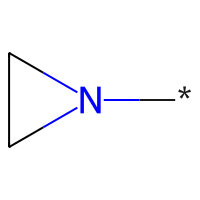
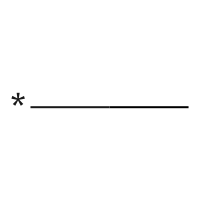
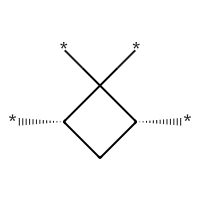
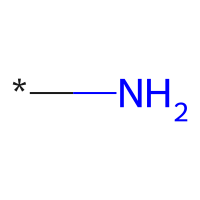
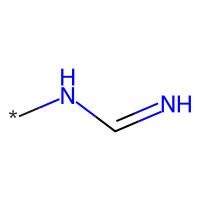

In [4]:
ff.count_uniques(frag_frame)


,Smiles,Molecule,numAttachments,Atoms,xyz,Labels
0,[4*]N1CC1,,1,"[10, 11, 12, 25, 26, 27, 28]","[[2.1614951848, 0.0987681757, -0.3856958646], ...","[N, C, C, H, H, H, H]"
1,[1*]C,,1,"[1, 13, 14, 15]","[[-0.4535358949, 0.2234540606, -1.6469131302],...","[C, H, H, H]"
2,[1*][C@@]1([2*])[C@H]([4*])C[C@@H]1[3*],,4,"[2, 6, 8, 9, 19, 22, 23, 24]","[[-0.3923738854, 0.0967594812, -0.1272617014],...","[C, C, C, C, H, H, H, H]"
3,[3*]N,,1,"[7, 20, 21]","[[-1.7727338429, -2.0346443043, -0.4117740679]...","[N, H, H]"
4,[2*]NC=N,,1,"[3, 4, 5, 16, 17, 18]","[[-0.9739272989, 1.2613052532, 0.5309204078], ...","[N, C, N, H, H, H]"

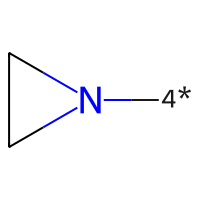
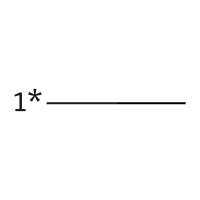
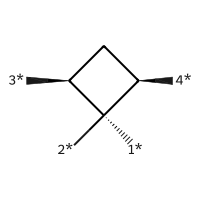
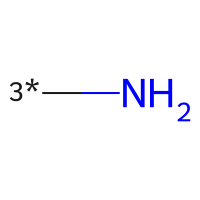
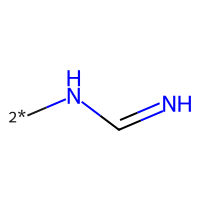

In [9]:
frag_frame

In [8]:
list(frag_frame.columns)

['Smiles', 'Molecule', 'numAttachments', 'Atoms', 'xyz', 'Labels']

In [31]:
xyz_coords[0]

[0.9934, 1.4958, -1.0601]

In [32]:
test_at = mol.GetAtomWithIdx(0)

In [33]:
for test_at in mol.GetAtoms():
    test_at.ClearProp('molAtomMapNumber')

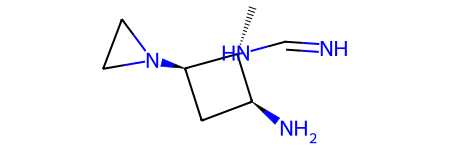

In [34]:
mol

In [35]:
xyz_from_cml('cml.txt')

[[-0.4535358949, 0.2234540606, -1.6469131302],
 [-0.3923738854, 0.0967594812, -0.1272617014],
 [-0.9739272989, 1.2613052532, 0.5309204078],
 [-2.3061639593, 1.5208333492, 0.5862179213],
 [-3.2105780508, 0.6968934172, 0.2794285903],
 [-0.8644637082, -1.2791216843, 0.4143152418],
 [-1.7727338429, -2.0346443043, -0.4117740679],
 [0.605360928, -1.7362453596, 0.4271652343],
 [1.0178751918, -0.2572102126, 0.4158366157],
 [2.1614951848, 0.0987681757, -0.3856958646],
 [2.8698080654, 1.308620243, -0.050858802],
 [3.4549510708, -0.0154556129, 0.2352463047],
 [0.080179527, 1.1136215794, -1.9647483359],
 [-0.0065310727, -0.6294532865, -2.1369999563],
 [-1.4844244748, 0.2972460666, -1.9676852362],
 [-0.3882507204, 2.0662769741, 0.5606715697],
 [-2.5133876958, 2.5177447362, 0.959564038],
 [-4.1169866791, 1.091255902, 0.4414637173],
 [-1.2173121541, -1.1389769619, 1.4342132274],
 [-1.9076522276, -2.9492677861, -0.0234428443],
 [-2.6608605685, -1.5688266572, -0.4147629255],
 [0.9416025871, -2.34202674